Read Dataset and

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados_raw = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/2%20-%20Statistic/yellow_fever_statistic.csv')
dados_raw.head()

,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,SE_IS,MES_IS,ANO_IS,OBITO,DIA_IS
0,N,RR,PACARAIMA,M,19,8,2,1995,0,19
1,NE,MA,AMARANTE DO MARANHÃO,M,33,14,4,1995,1,3
2,N,PA,CONCEIÇÃO DO ARAGUAIA,M,26,15,4,1995,1,12
3,N,AM,TAPAUÁ,M,29,4,1,1996,1,26
4,N,AM,RIO PRETO DA EVA,M,38,4,1,1996,1,27


In [3]:
dados_raw['SEXO'] = dados_raw['SEXO'].map({'M':1,'F':0}) # Transformation into binary/Transforma em binario

In [4]:
dados_raw[['SEXO','OBITO']] = dados_raw[['SEXO','OBITO']].astype(object) # Transformation into binary/Transforma em binario

In [5]:
dados_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MACRORREG_LPI  2652 non-null   object
 1   UF_LPI         2652 non-null   object
 2   MUN_LPI        2652 non-null   object
 3   SEXO           2652 non-null   object
 4   IDADE          2652 non-null   int64 
 5   SE_IS          2652 non-null   int64 
 6   MES_IS         2652 non-null   int64 
 7   ANO_IS         2652 non-null   int64 
 8   OBITO          2652 non-null   object
 9   DIA_IS         2652 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 207.3+ KB


In [6]:
# !pip install --upgrade category_encoders

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = dados_raw.drop('OBITO', axis = 1)
X

,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS
0,N,RR,PACARAIMA,1,19,2,1995,19
1,NE,MA,AMARANTE DO MARANHÃO,1,33,4,1995,3
2,N,PA,CONCEIÇÃO DO ARAGUAIA,1,26,4,1995,12
3,N,AM,TAPAUÁ,1,29,1,1996,26
4,N,AM,RIO PRETO DA EVA,1,38,1,1996,27
...,...,...,...,...,...,...,...,...
2647,S,SC,URUSSANGA,1,29,4,2021,22
2648,S,SC,ÁGUAS MORNAS,1,34,3,2021,19
2649,S,SC,TAIÓ,0,40,1,2021,6
2650,N,PA,AFUÁ,1,21,7,2021,7


In [18]:
y = dados_raw['OBITO']
y

0       0
1       1
2       1
3       1
4       1
       ..
2647    0
2648    1
2649    0
2650    1
2651    1
Name: OBITO, Length: 2652, dtype: object

In [20]:
SEED = 1337
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y)

In [21]:
x_train

,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS
445,CO,GO,ALTO PARAÍSO DE GOIÁS,1,23,1,2015,28
1511,SE,MG,JUIZ DE FORA,1,69,1,2018,20
1319,SE,SP,MAIRIPORÃ,0,57,1,2018,9
148,CO,GO,TERESINA DE GOIÁS,1,36,2,2000,11
1843,SE,RJ,CACHOEIRAS DE MACACU,0,45,2,2018,16
...,...,...,...,...,...,...,...,...
2453,SE,SP,MAIRIPORÃ,1,53,3,2018,3
249,SE,MG,SERRO,1,27,12,2002,21
1823,SE,MG,NOVA LIMA,0,41,2,2018,13
678,SE,ES,COLATINA,1,63,1,2017,23


In [22]:
x_test

,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS
2028,SE,MG,UBÁ,1,59,2,2018,12
2009,SE,MG,OURO BRANCO,1,48,2,2018,21
2053,SE,SP,PIEDADE,1,34,1,2018,25
2198,SE,SP,MIRACATU,1,50,2,2018,15
1359,SE,SP,MAIRIPORÃ,1,37,1,2018,7
...,...,...,...,...,...,...,...,...
2170,SE,MG,CARMÓPOLIS DE MINAS,1,61,1,2018,21
739,SE,MG,TEÓFILO OTONI,0,35,1,2017,17
2123,SE,SP,MAIRIPORÃ,1,60,2,2018,23
2094,SE,RJ,ANGRA DOS REIS,0,59,2,2018,7


In [41]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

In [42]:
encoder = TargetEncoder( cols= dados_raw[['MACRORREG_LPI','UF_LPI','MUN_LPI','SEXO']])

In [43]:
x_train_encoder = encoder.fit_transform(x_train,y_train)

In [48]:
scaler = StandardScaler()

In [49]:
x_train_encoder[['IDADE','MES_IS','ANO_IS','DIA_IS']] = scaler.fit_transform(x_train_encoder[['IDADE','MES_IS','ANO_IS','DIA_IS']])

In [51]:
x_train_encoder.head(25)

,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS
445,0.565567,0.563534,0.375589,0.398870,-1.182366,-0.571812,-0.004675,1.540279
1511,0.353692,0.350289,0.239055,0.398870,1.592348,-0.571812,0.491140,0.582164
1319,0.353692,0.352941,0.272060,0.259259,0.868510,-0.571812,0.491140,-0.735243
148,0.565567,0.563534,0.326876,0.398870,-0.398208,-0.216773,-2.483752,-0.495715
1843,0.353692,0.350427,0.393389,0.259259,0.144671,-0.216773,0.491140,0.103107
343,0.565567,0.563534,0.322463,0.259259,-0.820447,3.333614,-1.326850,1.540279
151,0.565567,0.563534,0.369212,0.398870,-0.639487,-0.216773,-2.483752,-0.256186
234,0.565567,0.500034,0.326876,0.398870,-1.303006,0.493305,-2.318481,-0.615479
1733,0.353692,0.350289,0.387883,0.398870,0.808190,-0.216773,0.491140,-0.735243
2059,0.353692,0.350289,0.218009,0.398870,0.868510,-0.571812,0.491140,0.462400


<Axes: >

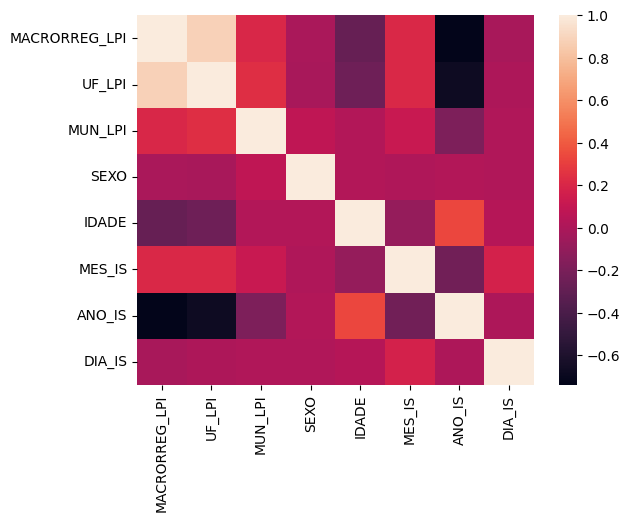

In [55]:
matriz = x_train_encoder.corr(method = 'pearson')
sns.heatmap(matriz)

<Axes: >

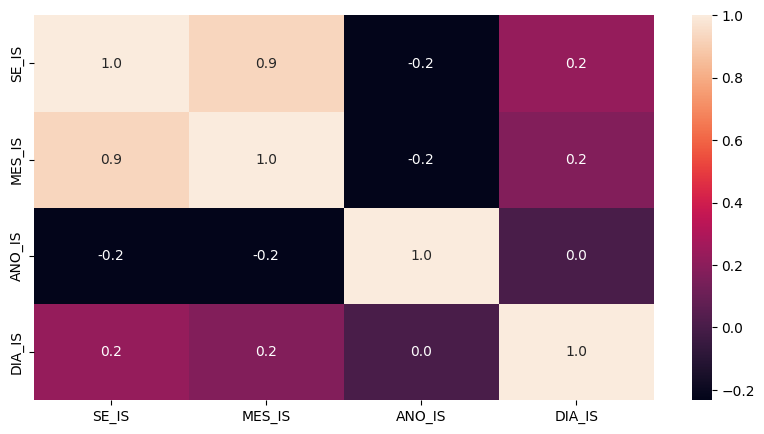

In [8]:
matriz = dados_raw[['SE_IS','MES_IS','ANO_IS','DIA_IS']].corr()
plt.figure(figsize = (10,5))
sns.heatmap(matriz, annot = True, fmt = ".1f")

In [9]:
dados_raw= dados_raw.drop('SE_IS', axis = 1)

In [10]:
dados_raw

,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,MES_IS,ANO_IS,OBITO,DIA_IS
0,N,RR,PACARAIMA,1,19,2,1995,0,19
1,NE,MA,AMARANTE DO MARANHÃO,1,33,4,1995,1,3
2,N,PA,CONCEIÇÃO DO ARAGUAIA,1,26,4,1995,1,12
3,N,AM,TAPAUÁ,1,29,1,1996,1,26
4,N,AM,RIO PRETO DA EVA,1,38,1,1996,1,27
...,...,...,...,...,...,...,...,...,...
2647,S,SC,URUSSANGA,1,29,4,2021,0,22
2648,S,SC,ÁGUAS MORNAS,1,34,3,2021,1,19
2649,S,SC,TAIÓ,0,40,1,2021,0,6
2650,N,PA,AFUÁ,1,21,7,2021,1,7
